In [1]:
from sympy import *
init_printing()

# Contact resistance of a sphere

## Straight line equipotential approximation



Start with the equation for resistance is
\begin{equation}
R = \frac{\Delta x}{\lambda A},
\end{equation}
where $\lambda$ is the thermal conductivity of the sample and $A$ cross-sectional area perpendicular to the path of heat flow.

When $A$ is a function of $x$ this becomes
\begin{equation}
R = \int_{x_1}^{x_2} \frac{\text{d}x}{\lambda A(x)}.
\end{equation}



The cross-sectional area is given by
\begin{equation}
A(x) = \pi h^2 = \pi \left( r^2 - (r-x)^2 \right).
\end{equation}
Substituting into the original integral gives
\begin{equation}
R = \int_{x_1}^{x_2} \frac{\text{d}x}{\lambda\pi \left( r^2 - (r-x)^2 \right)}.
\end{equation}

Lets try solve this with $x_1 = 0$ and $x_2 = r$

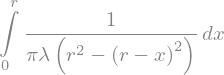

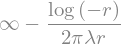

In [2]:
x, r, lambda_ = symbols("x r lambda", positive=True, real=True)
I = Integral(1/(lambda_*pi*(r**2-(r-x)**2)),(x,0,r))
display(I)
display(I.doit())

There is a singluarity as $A(0)=0$. Instead set $x_1=\epsilon$.

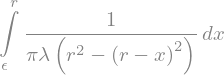

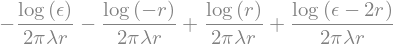

In [3]:
epsilon = symbols("epsilon", positive=True, real=True)
I = Integral(1/(lambda_*pi*(r**2-(r-x)**2)),(x,epsilon,r))
display(I)
display(I.doit())

\begin{equation}
\frac{1}{2\pi\lambda r} \log\left(\frac{\epsilon r - 2r^2}{-\epsilon r} \right) = \frac{1}{2\pi\lambda r} \log\left(\frac{2r}{\epsilon} - 1\right) 
\end{equation}

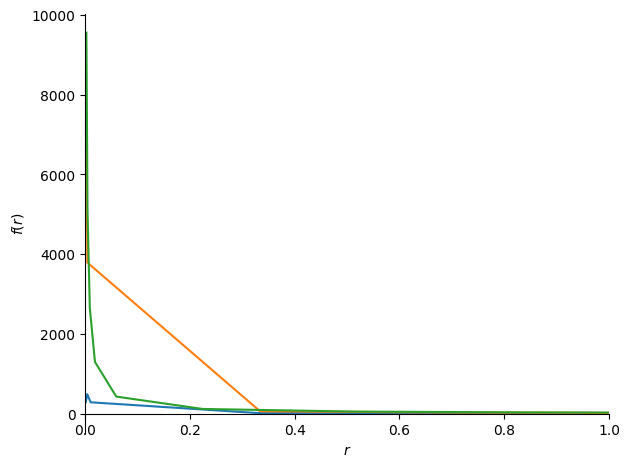

In [6]:
from sympy.plotting import plot

plot((1/r) * log((2*r/1e-3) - 1), (1/r) * log((2*r/1e-9) - 1), (1/r) * log((2*r/1e-12) - 1), xlim=[0,1])

## Curved equipotential



We want to find $A(t)$ by revolving the the following arc about the x axis.



Here $\theta (t)$ is given by
\begin{equation}
\theta (t) = \arccos \left(\frac{t}{2r} \right).
\end{equation}

We verify this in the plot below.

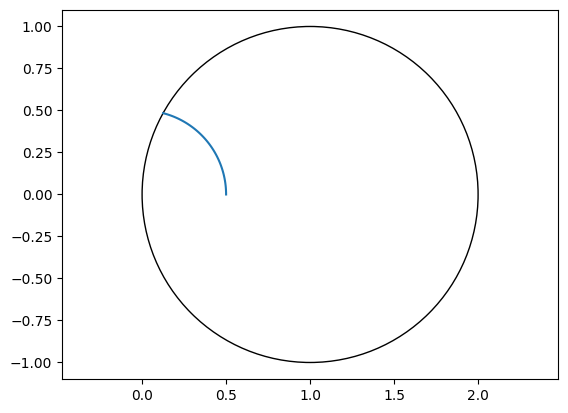

In [23]:
import matplotlib.pyplot as plt
import numpy as np

r = 1
x = 0.5

theta = np.linspace(0,np.arccos((x/(2*r))))

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((r, 0), r, fill=False))
ax.plot(x*np.cos(theta), x*np.sin(theta))
ax.set_xlim([0,2])
ax.set_ylim([-1,1])
ax.axis('equal')

This curve can be parameterized as $x(t,\theta)=t\cos (\theta)$ and $y(t,\theta)=t\sin (\theta)$. The surface area of this curve revolved around the x axis is
\begin{equation}
A(t) = 2\pi\int_{0}^{\arccos \left(t/2r \right)} y(t,\theta)\sqrt{\left (\frac{dx}{d\theta}\right )^2 + \left (\frac{dy}{d\theta}\right )^2} d\theta.
\end{equation}

In [50]:
r, t, theta = symbols("r t theta", positive=True, real=True)
x = t * cos(theta)
y = t * sin(theta)
display(x,y)

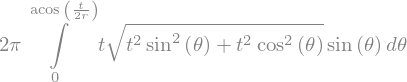

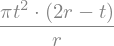

In [63]:
A = 2*pi * Integral(y * sqrt(x.diff(theta)**2 + y.diff(theta)**2), (theta,0,acos(t/(2*r))))
display(A)
A_t = A.doit().simplify()
display(A_t)

So $A(t) = \frac{\pi t^2 \left(2 r - t\right)}{r}$.

Finally we calculate the resistance
\begin{equation}
R = \int_{0}^{r} \frac{\text{d}t}{\lambda A(t)} = \int_{0}^{r} \frac{\text{d}t}{\lambda \frac{\pi t^2 \left(2 r - t\right)}{r}}.
\end{equation}

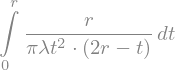

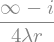

In [52]:
R = Integral(1/(lambda_*A_t),(t,0,r))
display(R)
display(R.doit().simplify())

Another singularity! Try with the lower bound as $\epsilon$

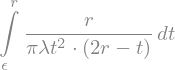

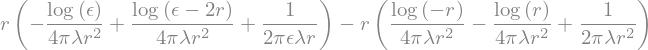

In [59]:
R = Integral(1/(lambda_*A_t),(t,epsilon,r))
display(R)
display(R.doit())

Simplifying gives
\begin{equation}
R(r) = \frac{1}{4\pi\lambda r}\log{\left (\frac{2r}{\epsilon} -1 \right)}
\end{equation}

# Verifying equapotentials with FEA
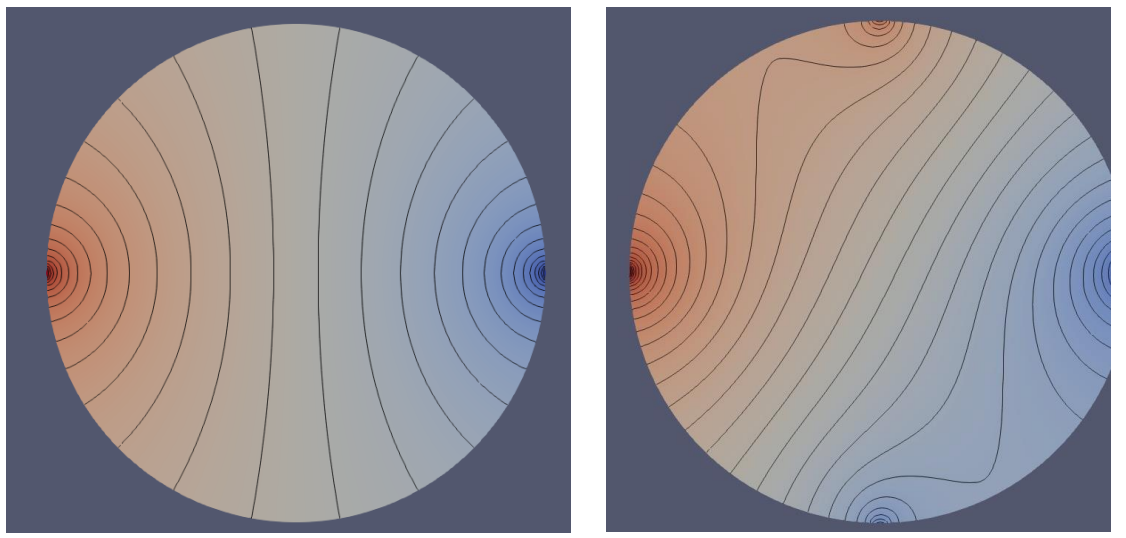